In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45.0,27.0,31.0,0.0
1,85,64.0,59.0,32.0,23.0,0.0
2,86,54.0,33.0,16.0,54.0,0.0
3,91,78.0,34.0,24.0,36.0,0.0
4,98,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54.0,25.0,22.0,35.0,4.0
341,89,48.0,32.0,22.0,14.0,4.0
342,85,52.0,22.0,23.0,34.0,4.0
343,95,93.0,21.0,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	11
float64		column 3	56
float64		column 4	45
float64		column 5	33
float64		column 6	56


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,345.000000,334.000000,289.000000,300.000000,312.000000,289.000000
mean,90.159420,69.982036,29.671280,24.306667,38.891026,3.425606
std,4.448096,18.379213,17.988786,9.316398,39.287967,3.290427
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.750000,0.500000
50%,90.000000,67.000000,26.000000,22.500000,26.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,48.000000,5.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

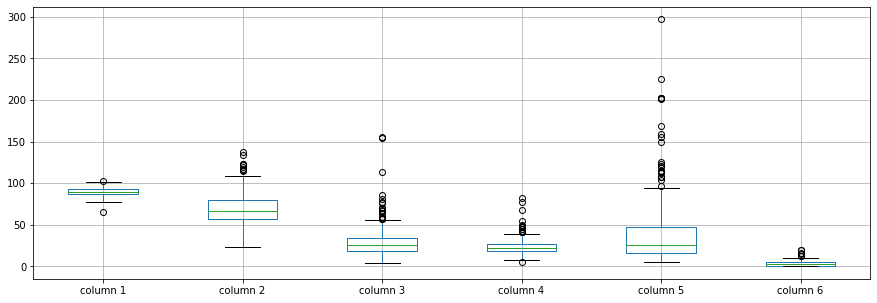

In [8]:
df.boxplot(return_type='axes', figsize=(15,5))

In [9]:
df.mean()

column 1    90.159420
column 2    69.982036
column 3    29.671280
column 4    24.306667
column 5    38.891026
column 6     3.425606
dtype: float64

In [10]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.037349,0.100479,0.140591,0.232482,0.323471
column 2,0.037349,1.000000,0.037901,0.120118,0.101931,0.089545
column 3,0.100479,0.037901,1.000000,0.684617,0.460061,0.238191
column 4,0.140591,0.120118,0.684617,1.000000,0.497728,0.258594
column 5,0.232482,0.101931,0.460061,0.497728,1.000000,0.325634
column 6,0.323471,0.089545,0.238191,0.258594,0.325634,1.000000


In [11]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [12]:
imputer = md.Midas(layer_structure = [6,6+22,6+22+22,6+22+22+22,6+22+22+22+22,6+22+22+22,6+22+22,6+22,6], vae_layer = False, seed = 220)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 261.4347650437128
Epoch: 1 , loss: 262.66770717075894
Epoch: 2 , loss: 261.7584308442615
Epoch: 3 , loss: 259.2893320719401
Epoch: 4 , loss: 262.0613759358724
Epoch: 5 , loss: 262.8018123081752
Epoch: 6 , loss: 261.4685516357422
Epoch: 7 , loss: 262.1196783156622
Epoch: 8 , loss: 261.0231664748419
Epoch: 9 , loss: 263.1343754359654
Epoch: 10 , loss: 262.49413117908296
Epoch: 11 , loss: 263.2907424200149
Epoch: 12 , loss: 262.6016097295852
Epoch: 13 , loss: 262.26641264415923
Epoch: 14 , loss: 260.9204581124442
Epoch: 15 , loss: 263.6329774402437
Epoch: 16 , loss: 261.36463855561755
Epoch: 17 , loss: 262.5336667015439
Epoch: 18 , loss: 261.2161022367932
Epoch: 19 , loss: 263.049795968192
Epoch: 20 , loss: 261.4455406552269
Epoch: 21 , loss: 262.7203834170387
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [13]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [14]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    47.000000
column 3     0.036941
column 4     0.039597
column 5    18.000000
column 6     0.035676
Name: 21, dtype: float64

In [15]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [16]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
340,0,0.0,0.0,0.0,0.0,0.0
341,0,0.0,0.0,0.0,0.0,0.0
342,0,0.0,0.0,0.0,0.0,0.0
343,0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [17]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [18]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [19]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

529.2707313569425

In [20]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [21]:
NRMS=numerator/denominator
NRMS


0.21004789819205757

In [22]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [23]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45.0,27.0,31.0,0.0
1,85,64.0,59.0,32.0,23.0,0.0
2,86,54.0,33.0,16.0,54.0,0.0
3,91,78.0,34.0,24.0,36.0,0.0
4,98,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54.0,25.0,22.0,35.0,4.0
341,89,48.0,32.0,22.0,14.0,4.0
342,85,52.0,22.0,23.0,34.0,4.0
343,95,93.0,21.0,27.0,47.0,6.0


In [24]:
imputations[-1].to_excel("Bupa_AN_10(imp).xlsx", index=False, header=False)